In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("StudentDepression_update_dataset.csv")
data.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Job Satisfaction                       27901 non-null  float64
 8   Sleep Duration                         27901 non-null  object 
 9   Dietary Habits                         27901 non-null  object 
 10  Degree                                 27901 non-null  object 
 11  Ha

In [4]:
X = data.drop('Depression', axis=1) ## select all columns accepet depression col
y = data['Depression'] ## select only depression column

In [5]:
X.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [6]:
numeric_cols = X.select_dtypes(exclude='object').columns.to_list() ## exclude object data type columns and save only int and float datatype columns
categoric_cols = X.select_dtypes(include='object').columns.to_list() ## only safe object dtype columns

## Import Required Libraries

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), ## fill nan values with median value
    ("minmax", MinMaxScaler()) ## scale the features
])

categoric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')), ## fill missing values with mode
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)) ## encode categorical features
])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_pipe, numeric_cols), ## given a name then pipeline load after that columns will go to pipeline
    ("cat", categoric_pipe, categoric_cols)  ##same as numerical columns work for categorical columns
    ])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
## dictionary of models to train and compare
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XG Boost": XGBClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier()
}

In [12]:
## train each model using the preprocessing pipeline
for name, model in models.items():
    print(f"\n===== Training {name} =====")

    ## a pipeline combining preprocessing and the model
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])

    ## train the model
    pipeline.fit(X_train, y_train)

    ## predictions for training and test sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    ## training performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)

    # test performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)

    print("\nModel performance for Training Set")
    print(f" - Accuracy Score:{model_train_accuracy:.4f}")
    print(f" - Precision Score:{model_train_precision:.4f}")
    print(f" - Recall Score:{model_train_recall:.4f}")
    print(f" - F1 Score:{model_train_f1:.4f}")

    print("\nModel performance for Test Set")
    print(f" - Accuracy Score:{model_test_accuracy:.4f}")
    print(f" - Precision Score:{model_test_precision:.4f}")
    print(f" - Recall Score:{model_test_recall:.4f}")
    print(f" - F1 Score:{model_test_f1:.4f}")

    print("=" * 40)


===== Training DecisionTree =====

Model performance for Training Set
 - Accuracy Score:1.0000
 - Precision Score:1.0000
 - Recall Score:1.0000
 - F1 Score:1.0000

Model performance for Test Set
 - Accuracy Score:0.7712
 - Precision Score:0.8077
 - Recall Score:0.7949
 - F1 Score:0.8012

===== Training RandomForest =====

Model performance for Training Set
 - Accuracy Score:1.0000
 - Precision Score:0.9999
 - Recall Score:1.0000
 - F1 Score:1.0000

Model performance for Test Set
 - Accuracy Score:0.8262
 - Precision Score:0.8385
 - Recall Score:0.8675
 - F1 Score:0.8528

===== Training XG Boost =====

Model performance for Training Set
 - Accuracy Score:0.9207
 - Precision Score:0.9223
 - Recall Score:0.9445
 - F1 Score:0.9333

Model performance for Test Set
 - Accuracy Score:0.8335
 - Precision Score:0.8489
 - Recall Score:0.8675
 - F1 Score:0.8581

===== Training Gradient Boost =====

Model performance for Training Set
 - Accuracy Score:0.8544
 - Precision Score:0.8641
 - Recall Sco

In [13]:
## Top 2 model hypertunning 

## Gradient Boost HyperTunning
gb_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4, 5],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

## AdaBoost HyperTunning 
ab_param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
    "base_estimator__max_depth": [1, 2, 3, 4, 5]
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV

gb_param_dist = {
    "classifier__n_estimators": [100, 200, 300, 500],
    "classifier__learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "classifier__max_depth": [2, 3, 4, 5],
    "classifier__subsample": [0.6, 0.7, 0.8, 1.0],
    "classifier__min_samples_leaf": [1, 2, 5, 10],
    "classifier__max_features": [None, "sqrt", "log2"]
}

ab_param_dist = {
    "classifier__n_estimators": [50, 100, 200, 300],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]
}
pipe_check = Pipeline([("preprocess", preprocessor), ("classifier", GradientBoostingClassifier())])
valid_classifier_keys = [k for k in pipe_check.get_params().keys() if k.startswith("classifier__")]
print("Sample classifier params exposed by pipeline:", valid_classifier_keys[:20])

pipe_gb = Pipeline([("preprocess", preprocessor), ("classifier", GradientBoostingClassifier(random_state=42))])

random_search_gb = RandomizedSearchCV(
    estimator=pipe_gb,
    param_distributions=gb_param_dist,
    n_iter=30,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_gb.fit(X_train, y_train)
print("Best params (GradientBoost):", random_search_gb.best_params_)

pipe_ab = Pipeline([("preprocess", preprocessor), ("classifier", AdaBoostClassifier(random_state=42))])

random_search_ab = RandomizedSearchCV(
    estimator=pipe_ab,
    param_distributions=ab_param_dist,
    n_iter=20,
    cv=3,
    scoring="f1",
    n_jobs=1,
    verbose=1,
    random_state=42
)

random_search_ab.fit(X_train, y_train)
print("Best params (AdaBoost):", random_search_ab.best_params_)


Sample classifier params exposed by pipeline: ['classifier__ccp_alpha', 'classifier__criterion', 'classifier__init', 'classifier__learning_rate', 'classifier__loss', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_iter_no_change', 'classifier__random_state', 'classifier__subsample', 'classifier__tol', 'classifier__validation_fraction', 'classifier__verbose', 'classifier__warm_start']
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params (GradientBoost): {'classifier__subsample': 0.8, 'classifier__n_estimators': 200, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 2, 'classifier__learning_rate': 0.2}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params (AdaBoost): {'classifier__n_estim

In [ ]:
## Tuned Model Training
mod_models = {
    "Gradient Boost": GradientBoostingClassifier(subsample=0.8,
                                                    n_estimators=200, min_samples_leaf=5,
                                                    max_features='sqrt', max_depth=2, learning_rate=0.2,
                                                    random_state=42),

    "Ada Boost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5,
                                    random_state=42)
}

for name, model in mod_models.items():
    print(f"\n===== Training {name} =====")

    ## a pipeline combining preprocessing and the model
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])

    ## train the model
    pipeline.fit(X_train, y_train)

    ## predictions for training and test sets
    y_train_pred1 = pipeline.predict(X_train)
    y_test_pred1 = pipeline.predict(X_test)

    train_metrics = {
        "accuracy": accuracy_score(y_train, y_train_pred1),
        "precision": precision_score(y_train, y_train_pred1, zero_division=0),
        "recall": recall_score(y_train, y_train_pred1, zero_division=0),
        "f1": f1_score(y_train, y_train_pred1, zero_division=0)
    }

    test_metrics = {
        "accuracy": accuracy_score(y_test, y_test_pred1),
        "precision": precision_score(y_test, y_test_pred1, zero_division=0),
        "recall": recall_score(y_test, y_test_pred1, zero_division=0),
        "f1": f1_score(y_test, y_test_pred1, zero_division=0)
    }

    # Print concise summary
    print("\nModel performance for Training Set")
    print(f" - Accuracy: {train_metrics['accuracy']:.4f}")
    print(f" - Precision: {train_metrics['precision']:.4f}")
    print(f" - Recall: {train_metrics['recall']:.4f}")
    print(f" - F1: {train_metrics['f1']:.4f}")

    print("\nModel performance for Test Set")
    print(f" - Accuracy: {test_metrics['accuracy']:.4f}")
    print(f" - Precision: {test_metrics['precision']:.4f}")
    print(f" - Recall: {test_metrics['recall']:.4f}")
    print(f" - F1: {test_metrics['f1']:.4f}")

    print("=" * 40)


===== Training Gradient Boost =====

Model performance for Training Set
 - Accuracy: 0.8530
 - Precision: 0.8602
 - Recall: 0.8950
 - F1: 0.8772

Model performance for Test Set
 - Accuracy: 0.8412
 - Precision: 0.8506
 - Recall: 0.8811
 - F1: 0.8656

===== Training Ada Boost =====

Model performance for Training Set
 - Accuracy: 0.8522
 - Precision: 0.8597
 - Recall: 0.8939
 - F1: 0.8765

Model performance for Test Set
 - Accuracy: 0.8378
 - Precision: 0.8477
 - Recall: 0.8783
 - F1: 0.8627


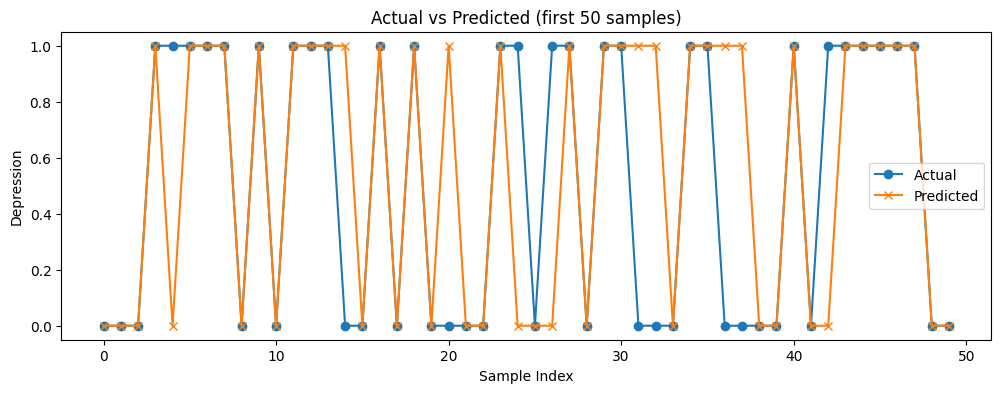

In [17]:
plt.figure(figsize=(12,4))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_test_pred1[:50], label='Predicted', marker='x')
plt.title("Actual vs Predicted (first 50 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Depression")
plt.legend()
plt.show()

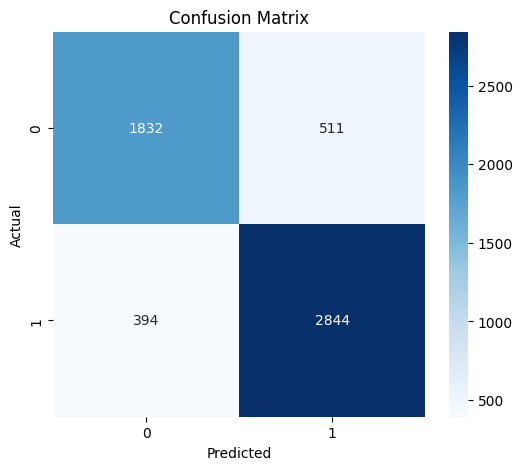


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred1)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred1))

In [20]:
import joblib

## Build the tuned pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", GradientBoostingClassifier(
        subsample=0.8,
        n_estimators=200,
        min_samples_leaf=5,
        max_features='sqrt',
        max_depth=2,
        learning_rate=0.2,
        random_state=42
    ))
])

# Train the tuned model
pipeline.fit(X_train, y_train)

# Save the trained tuned model
joblib.dump(pipeline, "gradient_boost_tuned_model.joblib")

print("Tuned Gradient Boost model saved successfully")

Tuned Gradient Boost model saved successfully
